In [ ]:
import requests
import json

# Specify the search term
query = '"generative ai"'

# Define the API endpoint URL
url = "http://api.semanticscholar.org/graph/v1/paper/search/bulk"

# Define the query parameters
query_params = {
    "query": '"generative ai"',
    "fields": "title,url,publicationTypes,publicationDate,citationCount,venue",
    "year": "2023-"
}

# Send the API request
response = requests.get(url, params=query_params).json()

In [4]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
import json

# Function to fetch data from Semantic Scholar API
def fetch_semantic_scholar_data(query, year_range="2023-", limit=100):
    url = "http://api.semanticscholar.org/graph/v1/paper/search/bulk" #"http://api.semanticscholar.org/graph/v1/paper/search"
    
    # Define query parameters
    query_params = {
        "query": query,
        "fields": "title,url,publicationTypes,publicationDate,citationCount,venue,authors.name,abstract,fieldsOfStudy",
        "year": year_range,
        "limit": limit
    }
    
    response = requests.get(url, params=query_params)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        print(response.text)
        return None


/home/syrine/Anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:

# Fetch data for generative AI papers
gen_ai_data = fetch_semantic_scholar_data('"generative ai"', year_range="2023-", limit=100)

# Check if we have data
if not gen_ai_data or 'data' not in gen_ai_data:
    print("No data retrieved.")
    exit()

# Convert to DataFrame
papers = pd.DataFrame(gen_ai_data['data'])

# Data cleaning and preprocessing
def clean_data(df):
    # Extract publication date
    df['publicationDate'] = pd.to_datetime(df['publicationDate'], errors='coerce')
    df['year'] = df['publicationDate'].dt.year
    df['month'] = df['publicationDate'].dt.month
    
    df['citationCount'] = df['citationCount'].fillna(0)
    
    df['pubType'] = df['publicationTypes'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else "Unknown")
    
    df['authorCount'] = df['authors'].apply(lambda x: len(x) if isinstance(x, list) else 0)
    
    df['fieldsList'] = df['fieldsOfStudy'].apply(lambda x: x if isinstance(x, list) else [])
    
    return df

# Clean the data
papers = clean_data(papers)

Dataset Overview:
Total number of papers: 999
Date range: 2023-02-05 00:00:00 to 2025-06-01 00:00:00
Average citation count: 4.63
Most cited paper: The imperative for regulatory oversight of large language models (or generative AI) in healthcare with 462 citations

Publication Types Distribution:
pubType
JournalArticle        824
Conference             60
Unknown                48
Review                 25
Book                   23
Editorial               5
LettersAndComments      5
CaseReport              5
News                    3
Study                   1
Name: count, dtype: int64

Citation Statistics:
count    999.000000
mean       4.633634
std       21.083666
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      462.000000
Name: citationCount, dtype: float64

Author Count Statistics:
count    999.000000
mean       3.702703
std        4.090007
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       86.000000
Name

Dataset Overview:
Total number of papers: 999
Date range: 2023-02-05 00:00:00 to 2025-06-01 00:00:00
Average citation count: 4.63
Most cited paper: The imperative for regulatory oversight of large language models (or generative AI) in healthcare with 462 citations

Publication Types Distribution:
pubType
JournalArticle        824
Conference             60
Unknown                48
Review                 25
Book                   23
Editorial               5
LettersAndComments      5
CaseReport              5
News                    3
Study                   1
Name: count, dtype: int64

Citation Statistics:
count    999.000000
mean       4.633634
std       21.083666
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      462.000000
Name: citationCount, dtype: float64


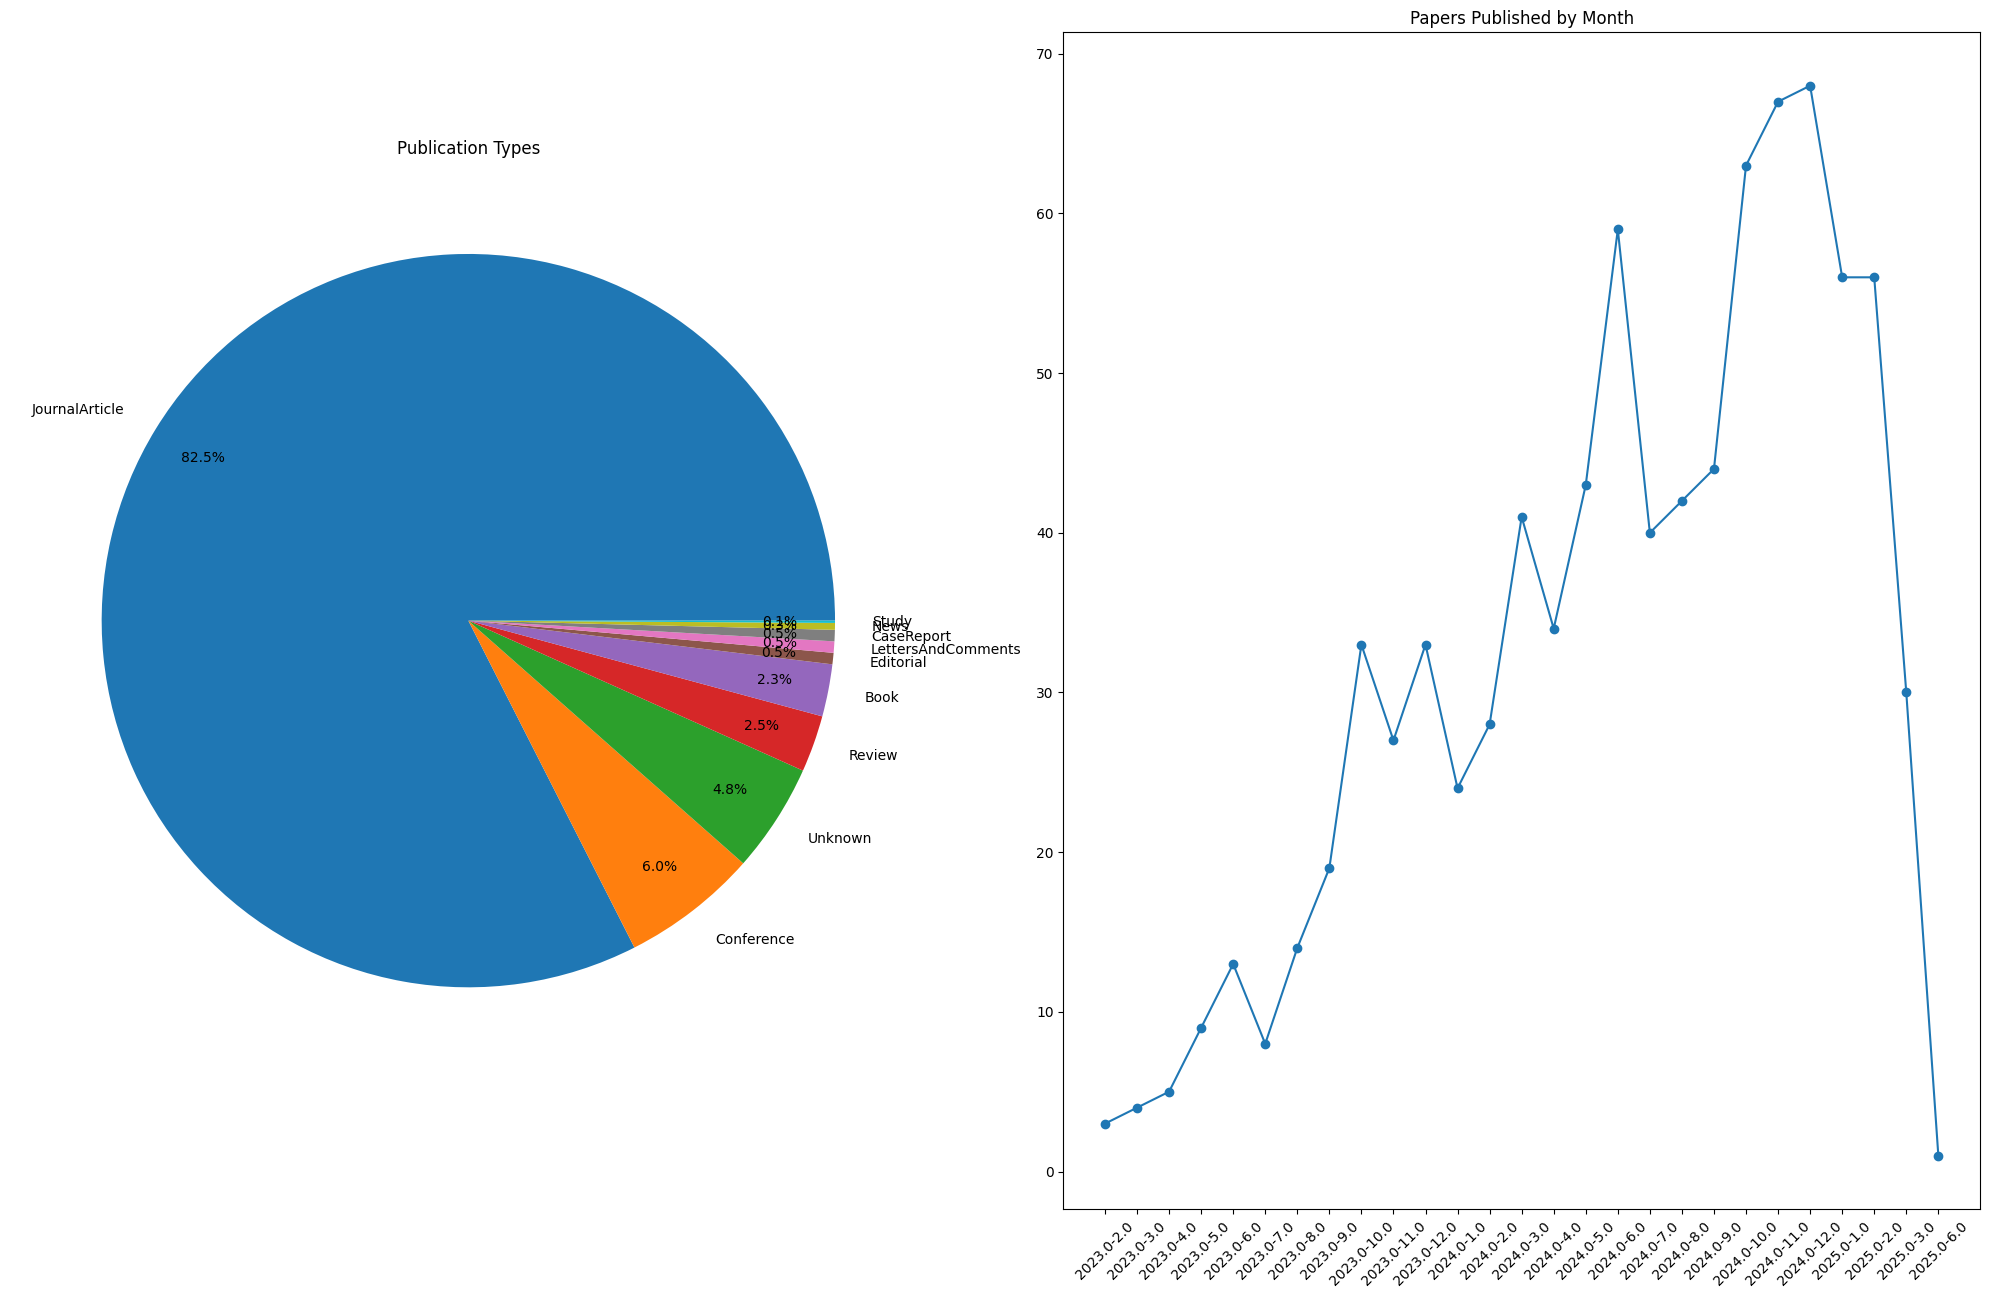

In [ ]:
# Basic statistics
print("Dataset Overview:")
print(f"Total number of papers: {len(papers)}")
print(f"Date range: {papers['publicationDate'].min()} to {papers['publicationDate'].max()}")
print(f"Average citation count: {papers['citationCount'].mean():.2f}")
print(f"Most cited paper: {papers.loc[papers['citationCount'].idxmax()]['title']} with {papers['citationCount'].max()} citations")

# Publication types analysis
pub_type_counts = papers['pubType'].value_counts()
print("\nPublication Types Distribution:")
print(pub_type_counts)

# Time series analysis of papers by month
papers_by_month = papers.groupby(['year', 'month']).size().reset_index(name='count')
papers_by_month['yearmonth'] = papers_by_month['year'].astype(str) + '-' + papers_by_month['month'].astype(str).str.zfill(2)

# Citation analysis
citation_stats = papers['citationCount'].describe()
print("\nCitation Statistics:")
print(citation_stats)

# Fields of study analysis
fields_counter = Counter()
for fields in papers['fieldsList']:
    for field in fields:
        fields_counter[field] += 1

top_fields = pd.DataFrame({
    'Field': [item[0] for item in fields_counter.most_common(10)],
    'Count': [item[1] for item in fields_counter.most_common(10)]
})

# Venues analysis
venue_counts = papers['venue'].value_counts().head(10)
plt.figure(figsize=(20, 25))
# Publication types pie chart
plt.subplot(2, 2, 1)
pub_type_counts.plot(kind='pie', autopct='%1.1f%%', title='Publication Types',   pctdistance=0.85, labeldistance=1.1)
plt.ylabel('')
plt.tight_layout() 

# Papers by month line chart
plt.subplot(2, 2, 2)
plt.plot(papers_by_month['yearmonth'], papers_by_month['count'], marker='o')
plt.title('Papers Published by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


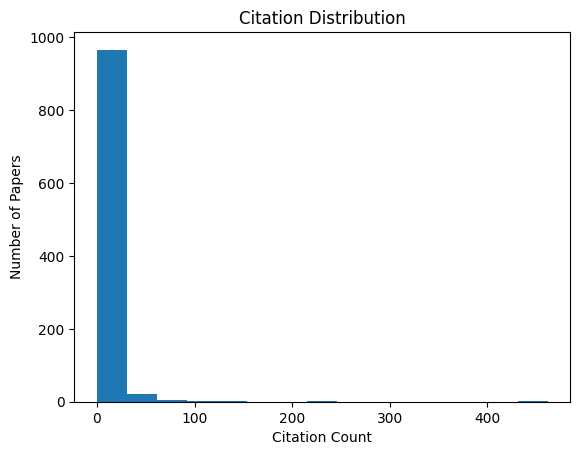

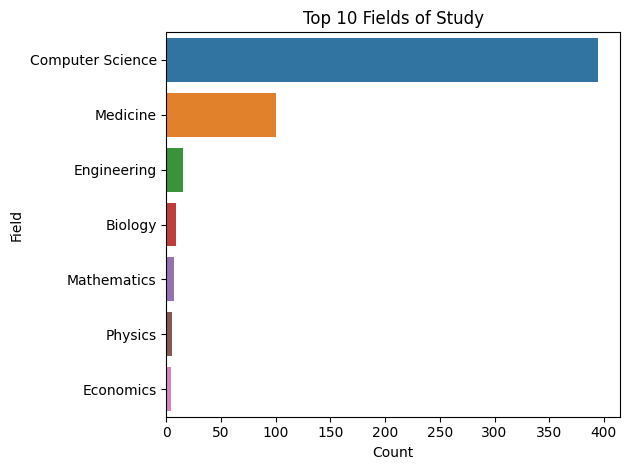

In [34]:
# Citation distribution histogram
plt.hist(papers['citationCount'], bins=15)
plt.title('Citation Distribution')
plt.xlabel('Citation Count')
plt.ylabel('Number of Papers')
plt.show()

# Top fields bar chart
sns.barplot(x='Count', y='Field', data=top_fields)
plt.title('Top 10 Fields of Study')
plt.tight_layout()
plt.show()



In [41]:
# Author analysis
author_counts = []
for author_list in papers['authors']:
    author_counts.append(len(author_list) if isinstance(author_list, list) else 0)

papers['author_count'] = author_counts
author_stats = papers['author_count'].describe()
print("\nAuthor Count Statistics:")
print(author_stats)


# Save the cleaned data
papers.to_csv('generative_ai_papers.csv', index=False)


Author Count Statistics:
count    999.000000
mean       3.702703
std        4.090007
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       86.000000
Name: author_count, dtype: float64


In [36]:
# Additional insights: Top 10 most cited papers
top_cited = papers.sort_values('citationCount', ascending=False).head(10)[['title', 'citationCount', 'publicationDate', 'venue']]
print("\nTop 10 Most Cited Papers:")
print(top_cited)


Top 10 Most Cited Papers:
                                                 title  citationCount  \
393  The imperative for regulatory oversight of lar...            462   
871  scGPT: toward building a foundation model for ...            240   
949  The Impact of AI on Developer Productivity: Ev...            225   
859  Generative artificial intelligence as a new co...            130   
879  Future research recommendations for transformi...            121   
993      TPACK in the age of ChatGPT and Generative AI            116   
356  The Gradient of Generative AI Release: Methods...             94   
924  A multimodal generative AI copilot for human p...             74   
664  Accelerating Innovation With Generative AI: AI...             73   
323                   How AI can distort human beliefs             71   

    publicationDate                                              venue  
393      2023-07-06                                npj Digit. Medicine  
871      2024-02-26    

In [37]:
# Additional insights: Venue analysis
top_venues = papers['venue'].value_counts().head(10)
print("\nTop 10 Publication Venues:")
print(top_venues)


Top 10 Publication Venues:
venue
arXiv.org                                                                     139
Social Science Research Network                                                35
                                                                               25
ASCILITE Publications                                                           9
bioRxiv                                                                         7
Computers and Education: Artificial Intelligence                                6
INTERANTIONAL JOURNAL OF SCIENTIFIC RESEARCH IN ENGINEERING AND MANAGEMENT      5
Academy of Management Proceedings                                               5
IEEE Access                                                                     4
IEEE International Conference on Consumer Electronics                           4
Name: count, dtype: int64


In [38]:
venue_counts

venue
arXiv.org                                                                     139
Social Science Research Network                                                35
                                                                               25
ASCILITE Publications                                                           9
bioRxiv                                                                         7
Computers and Education: Artificial Intelligence                                6
INTERANTIONAL JOURNAL OF SCIENTIFIC RESEARCH IN ENGINEERING AND MANAGEMENT      5
Academy of Management Proceedings                                               5
IEEE Access                                                                     4
IEEE International Conference on Consumer Electronics                           4
Name: count, dtype: int64

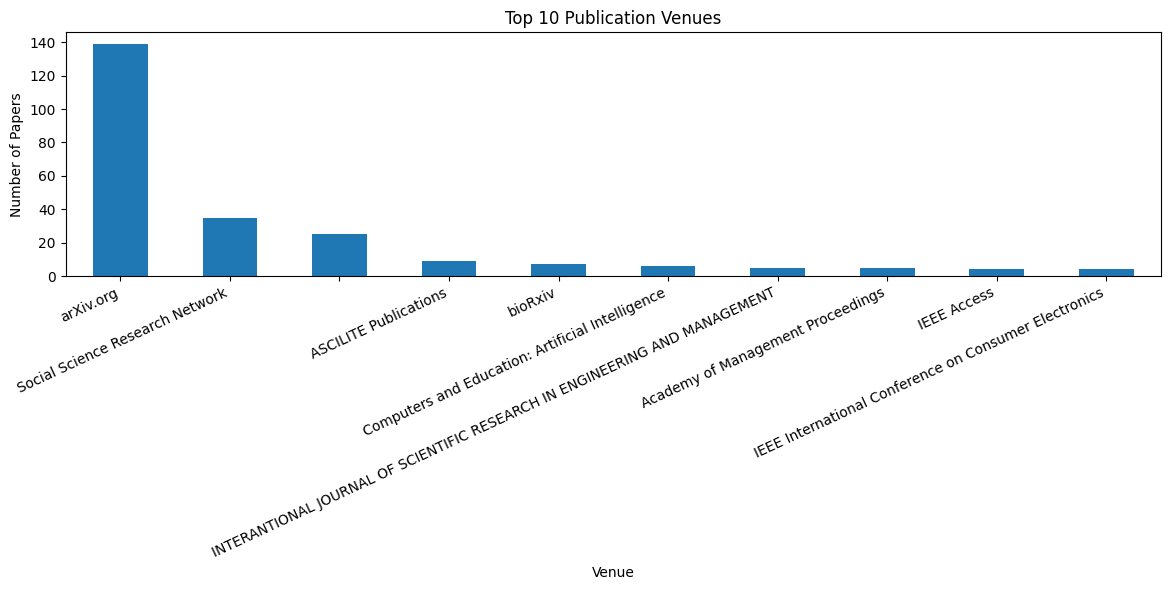

In [39]:
# Visualization: Top venues bar chart
plt.figure(figsize=(12, 6))
venue_counts.plot(kind='bar')
plt.title('Top 10 Publication Venues')
plt.xlabel('Venue')
plt.ylabel('Number of Papers')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()



Citation Statistics by Venue:
                                                    count       mean  median  \
venue                                                                          
arXiv.org                                             139   5.100719     1.0   
Social Science Research Network                        35   3.971429     1.0   
                                                       25   0.600000     0.0   
ASCILITE Publications                                   9   0.888889     0.0   
bioRxiv                                                 7   2.285714     1.0   
Computers and Education: Artificial Intelligence        6  36.833333    22.0   
INTERANTIONAL JOURNAL OF SCIENTIFIC RESEARCH IN...      5   0.800000     0.0   
Academy of Management Proceedings                       5   0.000000     0.0   
Cureus                                                  4   8.750000     3.0   
Nature                                                  4  25.000000    12.5   

        

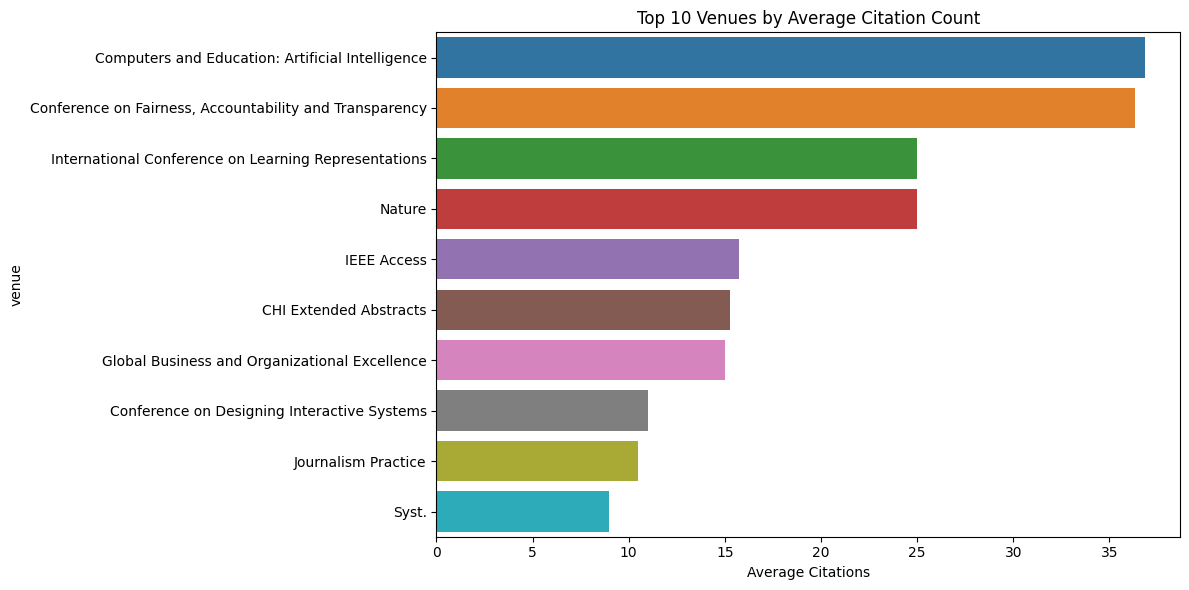

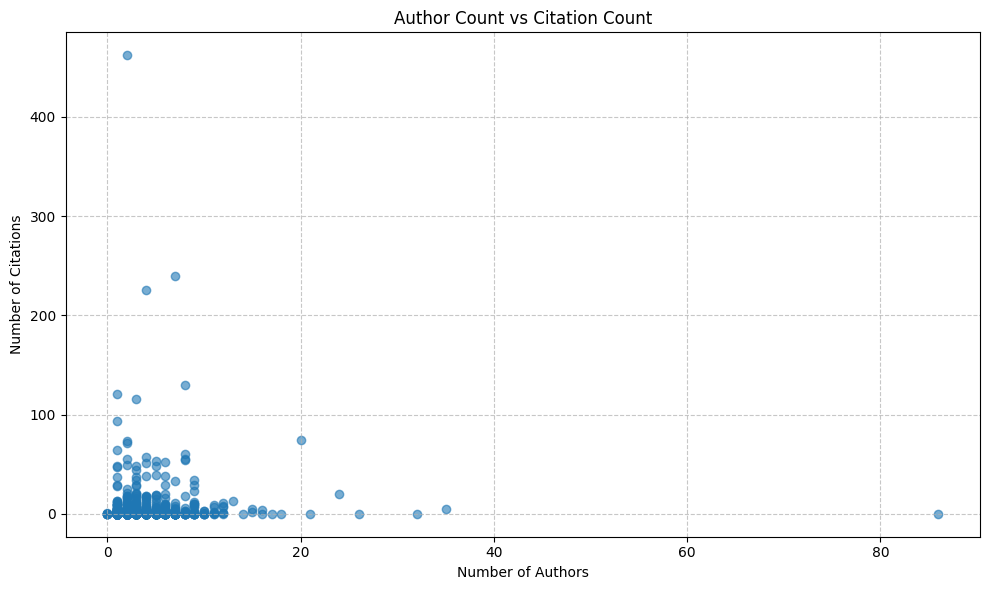


Publication Types by Top Venues:
pubType                                             Book  CaseReport  \
venue                                                                  
arXiv.org                                              0           0   
Social Science Research Network                        0           1   
                                                       2           4   
ASCILITE Publications                                  0           0   
bioRxiv                                                0           0   
Computers and Education: Artificial Intelligence       0           0   
INTERANTIONAL JOURNAL OF SCIENTIFIC RESEARCH IN...     0           0   
Academy of Management Proceedings                      0           0   
Cureus                                                 0           0   
Nature                                                 0           0   

pubType                                             Conference  Editorial  \
venue                   

/tmp/ipykernel_10546/1779695774.py:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

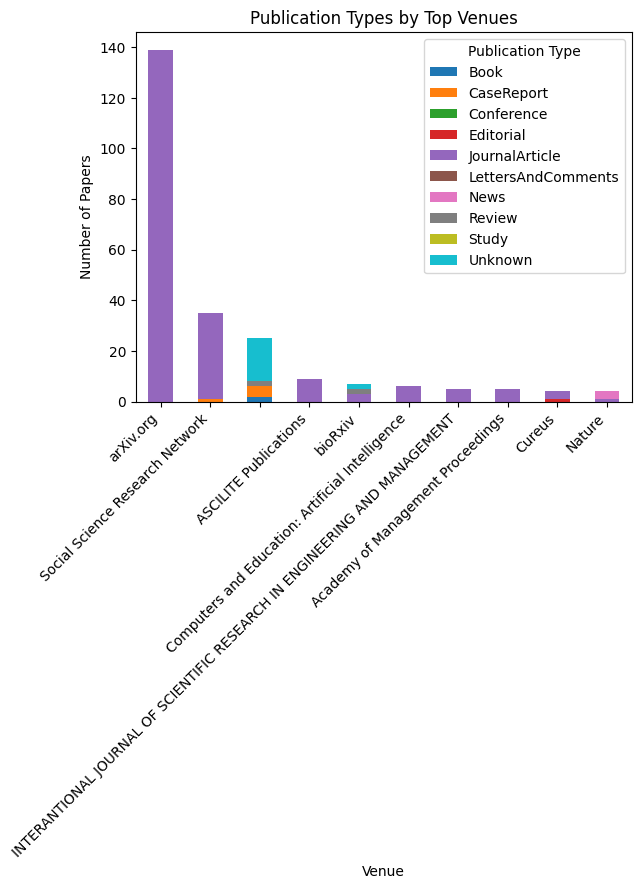

In [44]:
# Citation statistics by venue
citation_by_venue = papers.groupby('venue')['citationCount'].agg(['count', 'mean', 'median', 'max']).sort_values('count', ascending=False)
# Filter to only include venues with at least 2 papers to avoid noise
citation_by_venue = citation_by_venue[citation_by_venue['count'] >= 2]

print("\nCitation Statistics by Venue:")
print(citation_by_venue.head(10))



# Visualization: Top venues by average citation count
plt.figure(figsize=(12, 6))
top_venues_by_citations = citation_by_venue.sort_values('mean', ascending=False).head(10)
sns.barplot(x=top_venues_by_citations['mean'], y=top_venues_by_citations.index)
plt.title('Top 10 Venues by Average Citation Count')
plt.xlabel('Average Citations')
plt.tight_layout()
plt.show()

# Scatter plot of author count vs citation count
plt.figure(figsize=(10, 6))
plt.scatter(papers['author_count'], papers['citationCount'], alpha=0.6)
plt.title('Author Count vs Citation Count')
plt.xlabel('Number of Authors')
plt.ylabel('Number of Citations')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Additional analysis: Publication types by venue
# Create a crosstab of venue and publication type
venue_pubtype = pd.crosstab(papers['venue'], papers['pubType'])
top_venues_pubtype = venue_pubtype.loc[citation_by_venue.head(10).index]
print("\nPublication Types by Top Venues:")
print(top_venues_pubtype)

# Visualization: Publication types by top venues
plt.figure(figsize=(14, 8))
top_venues_pubtype.plot(kind='bar', stacked=True)
plt.title('Publication Types by Top Venues')
plt.xlabel('Venue')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Publication Type')
plt.tight_layout()
plt.show()



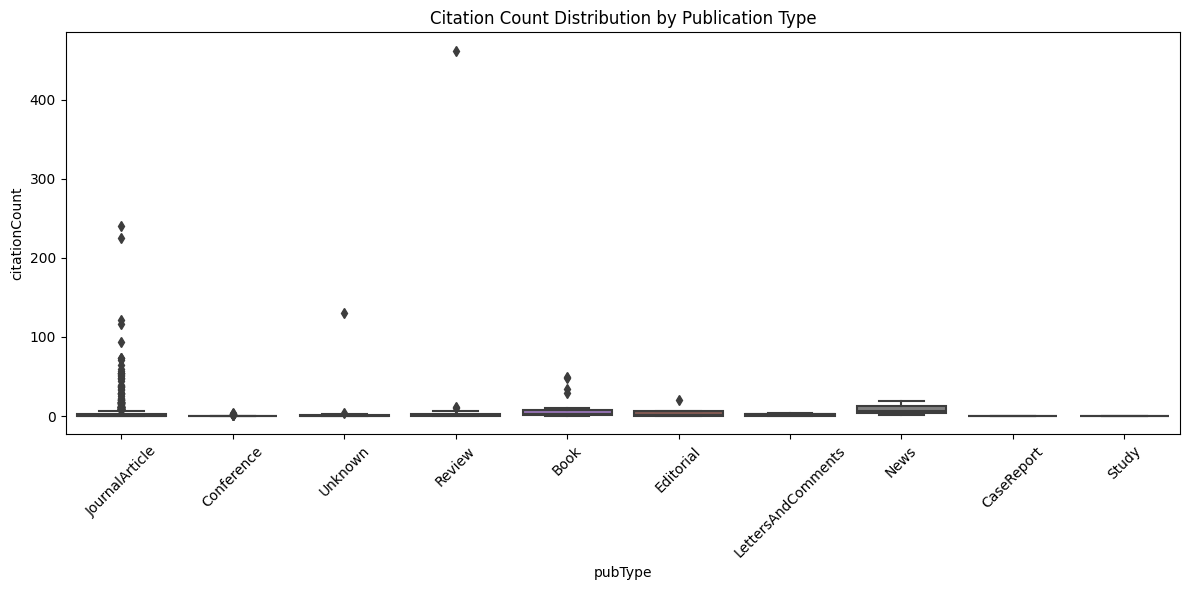


Venue Summary Statistics (Top 10 by paper count):
                                                   citationCount             \
                                                           count       mean   
venue                                                                         
arXiv.org                                                    139   5.100719   
Social Science Research Network                               35   3.971429   
                                                              25   0.600000   
ASCILITE Publications                                          9   0.888889   
bioRxiv                                                        7   2.285714   
Computers and Education: Artificial Intelligence               6  36.833333   
INTERANTIONAL JOURNAL OF SCIENTIFIC RESEARCH IN...             5   0.800000   
Academy of Management Proceedings                              5   0.000000   
Cureus                                                         4   8.750000   
N

In [22]:
# Citation count distribution by publication type
plt.figure(figsize=(12, 6))
sns.boxplot(x='pubType', y='citationCount', data=papers)
plt.title('Citation Count Distribution by Publication Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics by venue
venue_summary = papers.groupby('venue').agg({
    'citationCount': ['count', 'mean', 'median', 'max'],
    'author_count': ['mean', 'median'],
    'abstract_length': ['mean']
}).sort_values(('citationCount', 'count'), ascending=False).head(10)

print("\nVenue Summary Statistics (Top 10 by paper count):")
print(venue_summary)